In [110]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [58]:
#importing training dataset
train = pd.read_csv("customer_churn_dataset-training-master.csv")
test = pd.read_csv("customer_churn_dataset-testing-master.csv")

Pre-processing

In [3]:
#showing first few rows of dataset

train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
#figure out how many different values are in the columns with string datatype

unique_gender = train["Gender"].unique()

print("Unique values in Gender column:", unique_gender)

unique_subtype = train["Subscription Type"].unique()

print("Unique values in Subscription Type column:", unique_subtype)

unique_contractLenght = train["Contract Length"].unique()

print("Unique values in Contract Length column:", unique_contractLenght)

Unique values in Gender column: ['Female' 'Male' nan]
Unique values in Subscription Type column: ['Standard' 'Basic' 'Premium' nan]
Unique values in Contract Length column: ['Annual' 'Monthly' 'Quarterly' nan]


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [59]:
#There are nan values in columns -> check for nan values in every column
train.isna().sum()
#as only 1 all entries with missing value can be deleted without significant loss of information

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [60]:
test.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [61]:
#drop missing values
train.dropna(inplace=True)

In [8]:
#replace string values with int

#train["Gender"] = train["Gender"].replace({"Female":1, "Male":2})
#train["Subscription Type"] = train["Subscription Type"].replace({"Standard":1, "Basic":2, "Premium":3})
#train["Contract Length"] = train["Contract Length"].replace({"Annual":1, "Quarterly":2, "Monthly":3})

In [62]:
#replace categorical string values with numerical values
labelencoder = LabelEncoder()
train["Gender"] = labelencoder.fit_transform(train["Gender"])
train["Subscription Type"] = labelencoder.fit_transform(train["Subscription Type"])
train["Contract Length"] = labelencoder.fit_transform(train["Contract Length"])

test["Gender"] = labelencoder.fit_transform(test["Gender"])
test["Subscription Type"] = labelencoder.fit_transform(test["Subscription Type"])
test["Contract Length"] = labelencoder.fit_transform(test["Contract Length"])


Outlier Detection

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Usage Frequency'}>,
        <Axes: title={'center': 'Support Calls'}>],
       [<Axes: title={'center': 'Payment Delay'}>,
        <Axes: title={'center': 'Subscription Type'}>,
        <Axes: title={'center': 'Contract Length'}>],
       [<Axes: title={'center': 'Total Spend'}>,
        <Axes: title={'center': 'Last Interaction'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

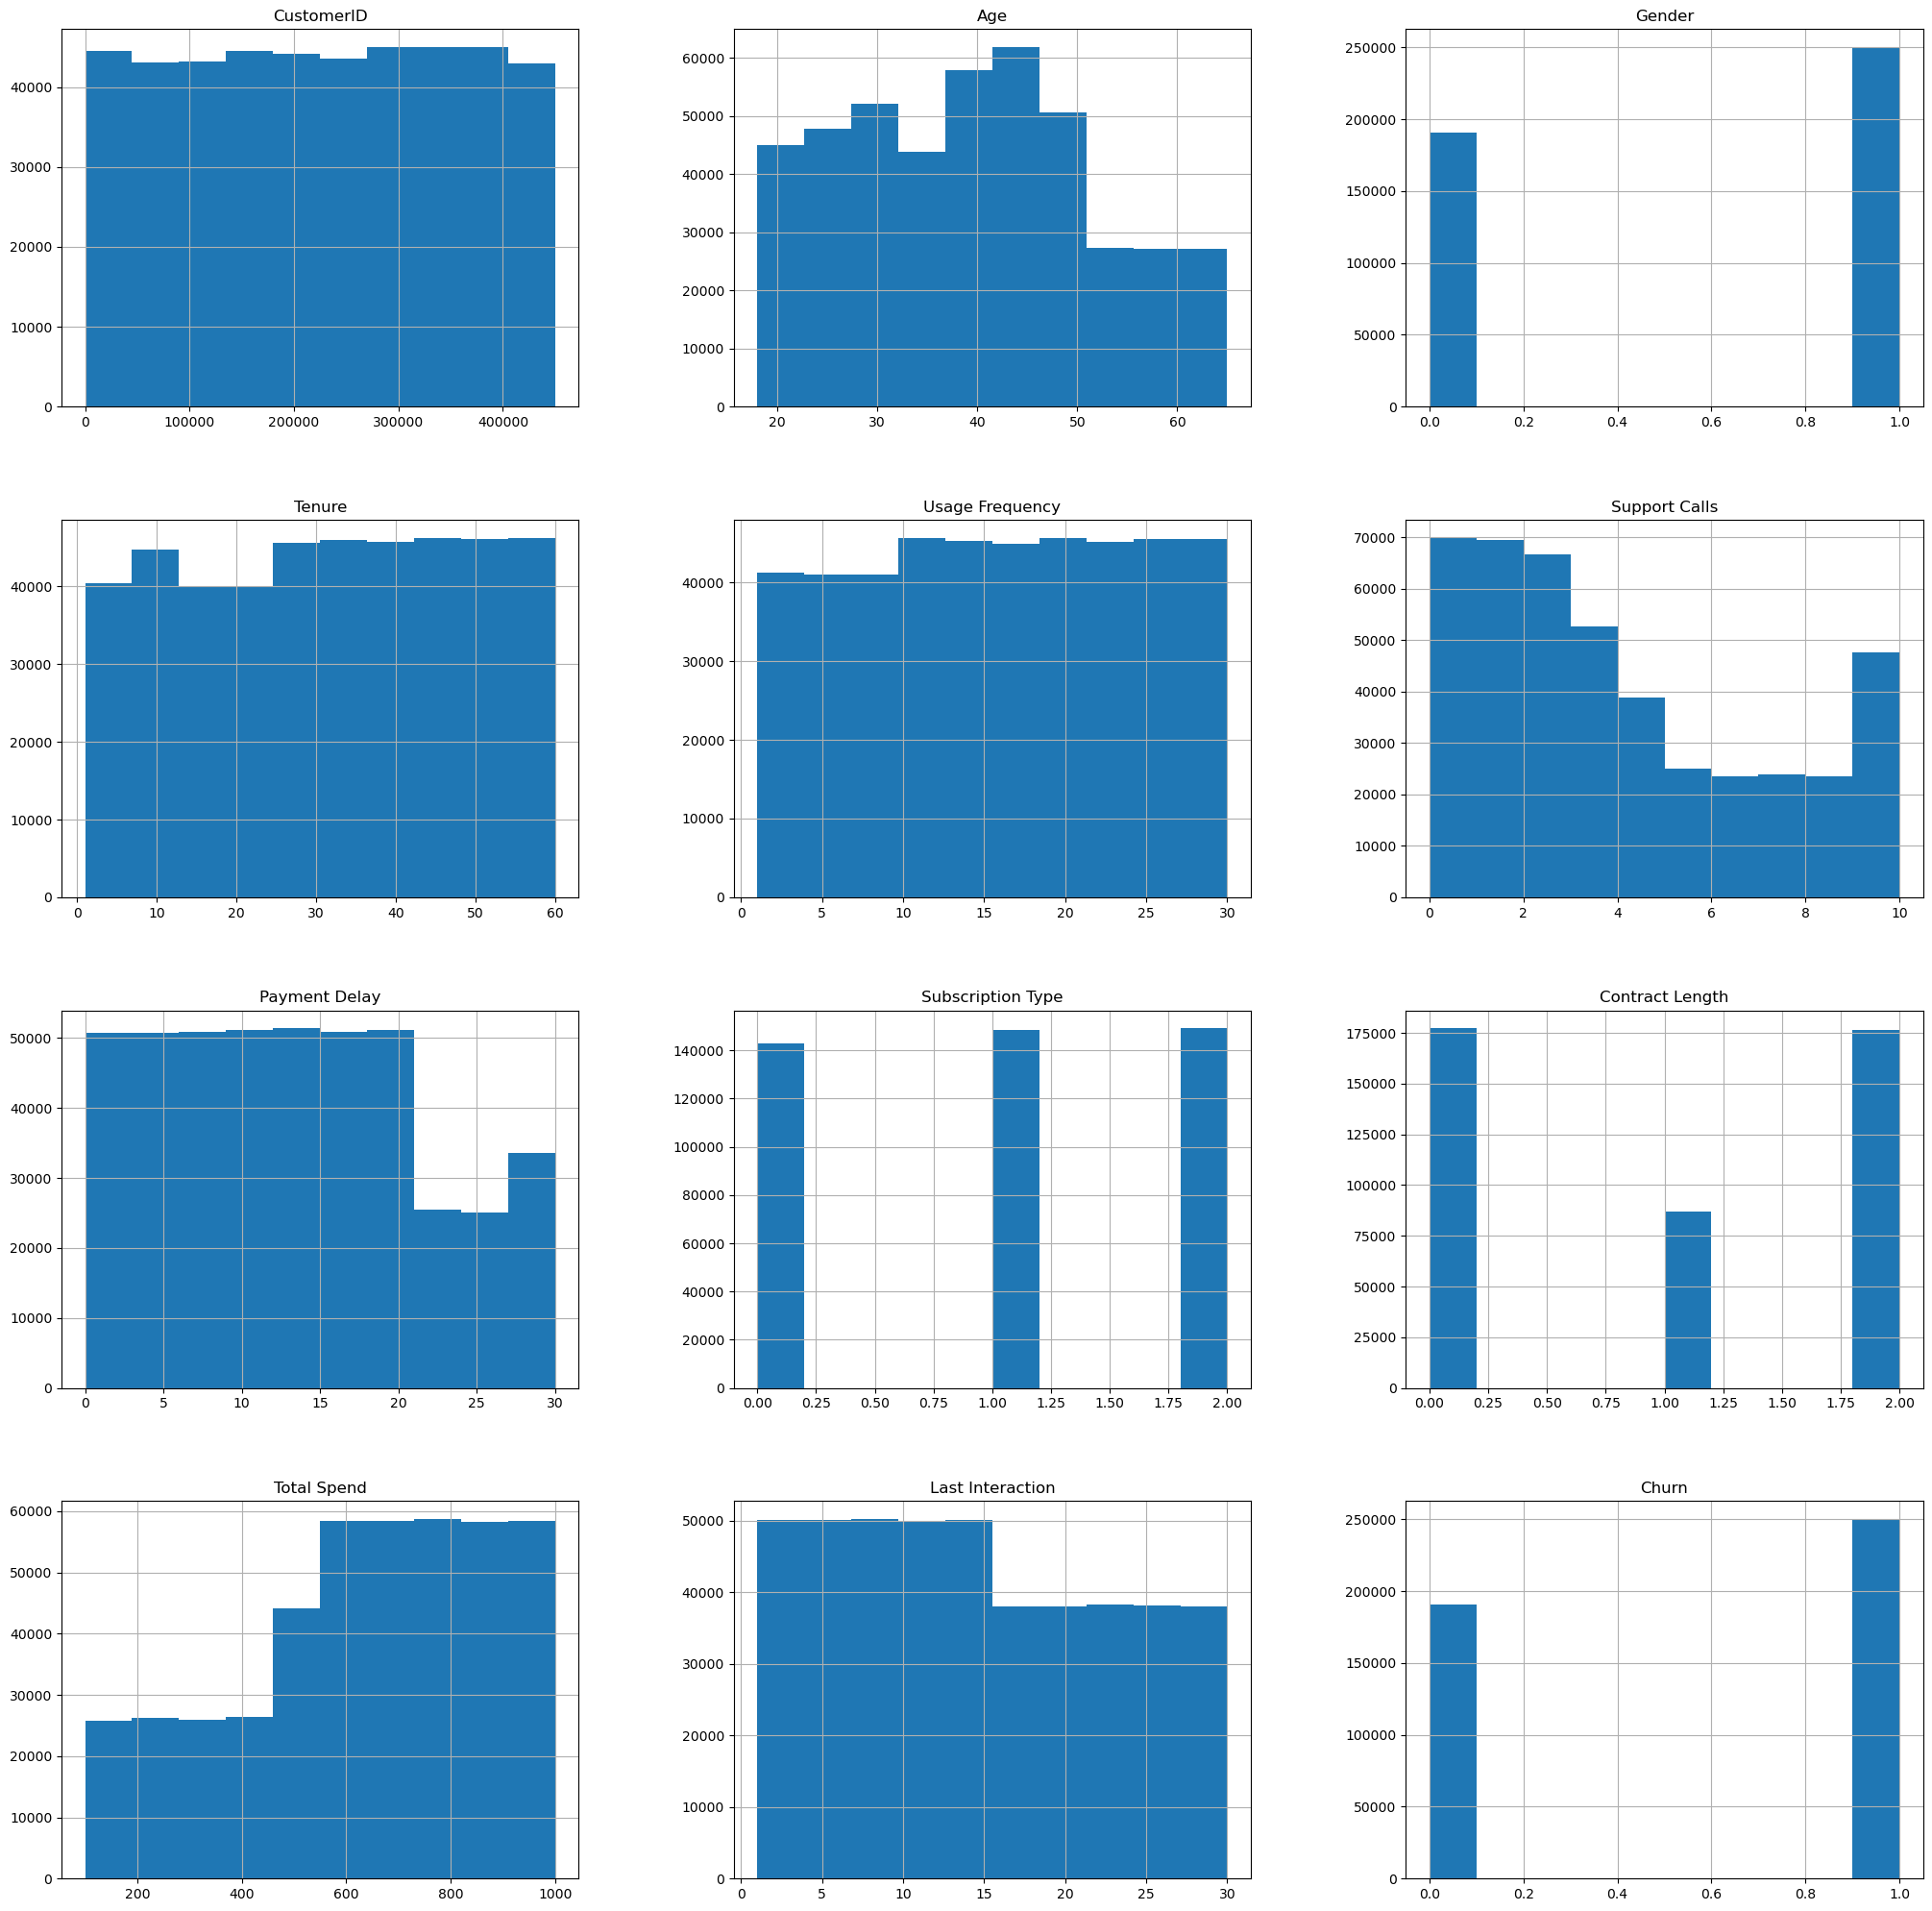

In [10]:
# Distribution with historgrams 
train.hist(bins=10, figsize=(25,25))
#good balance in target variable churn 
#other columns also good balanced and not outlier can be detected visually

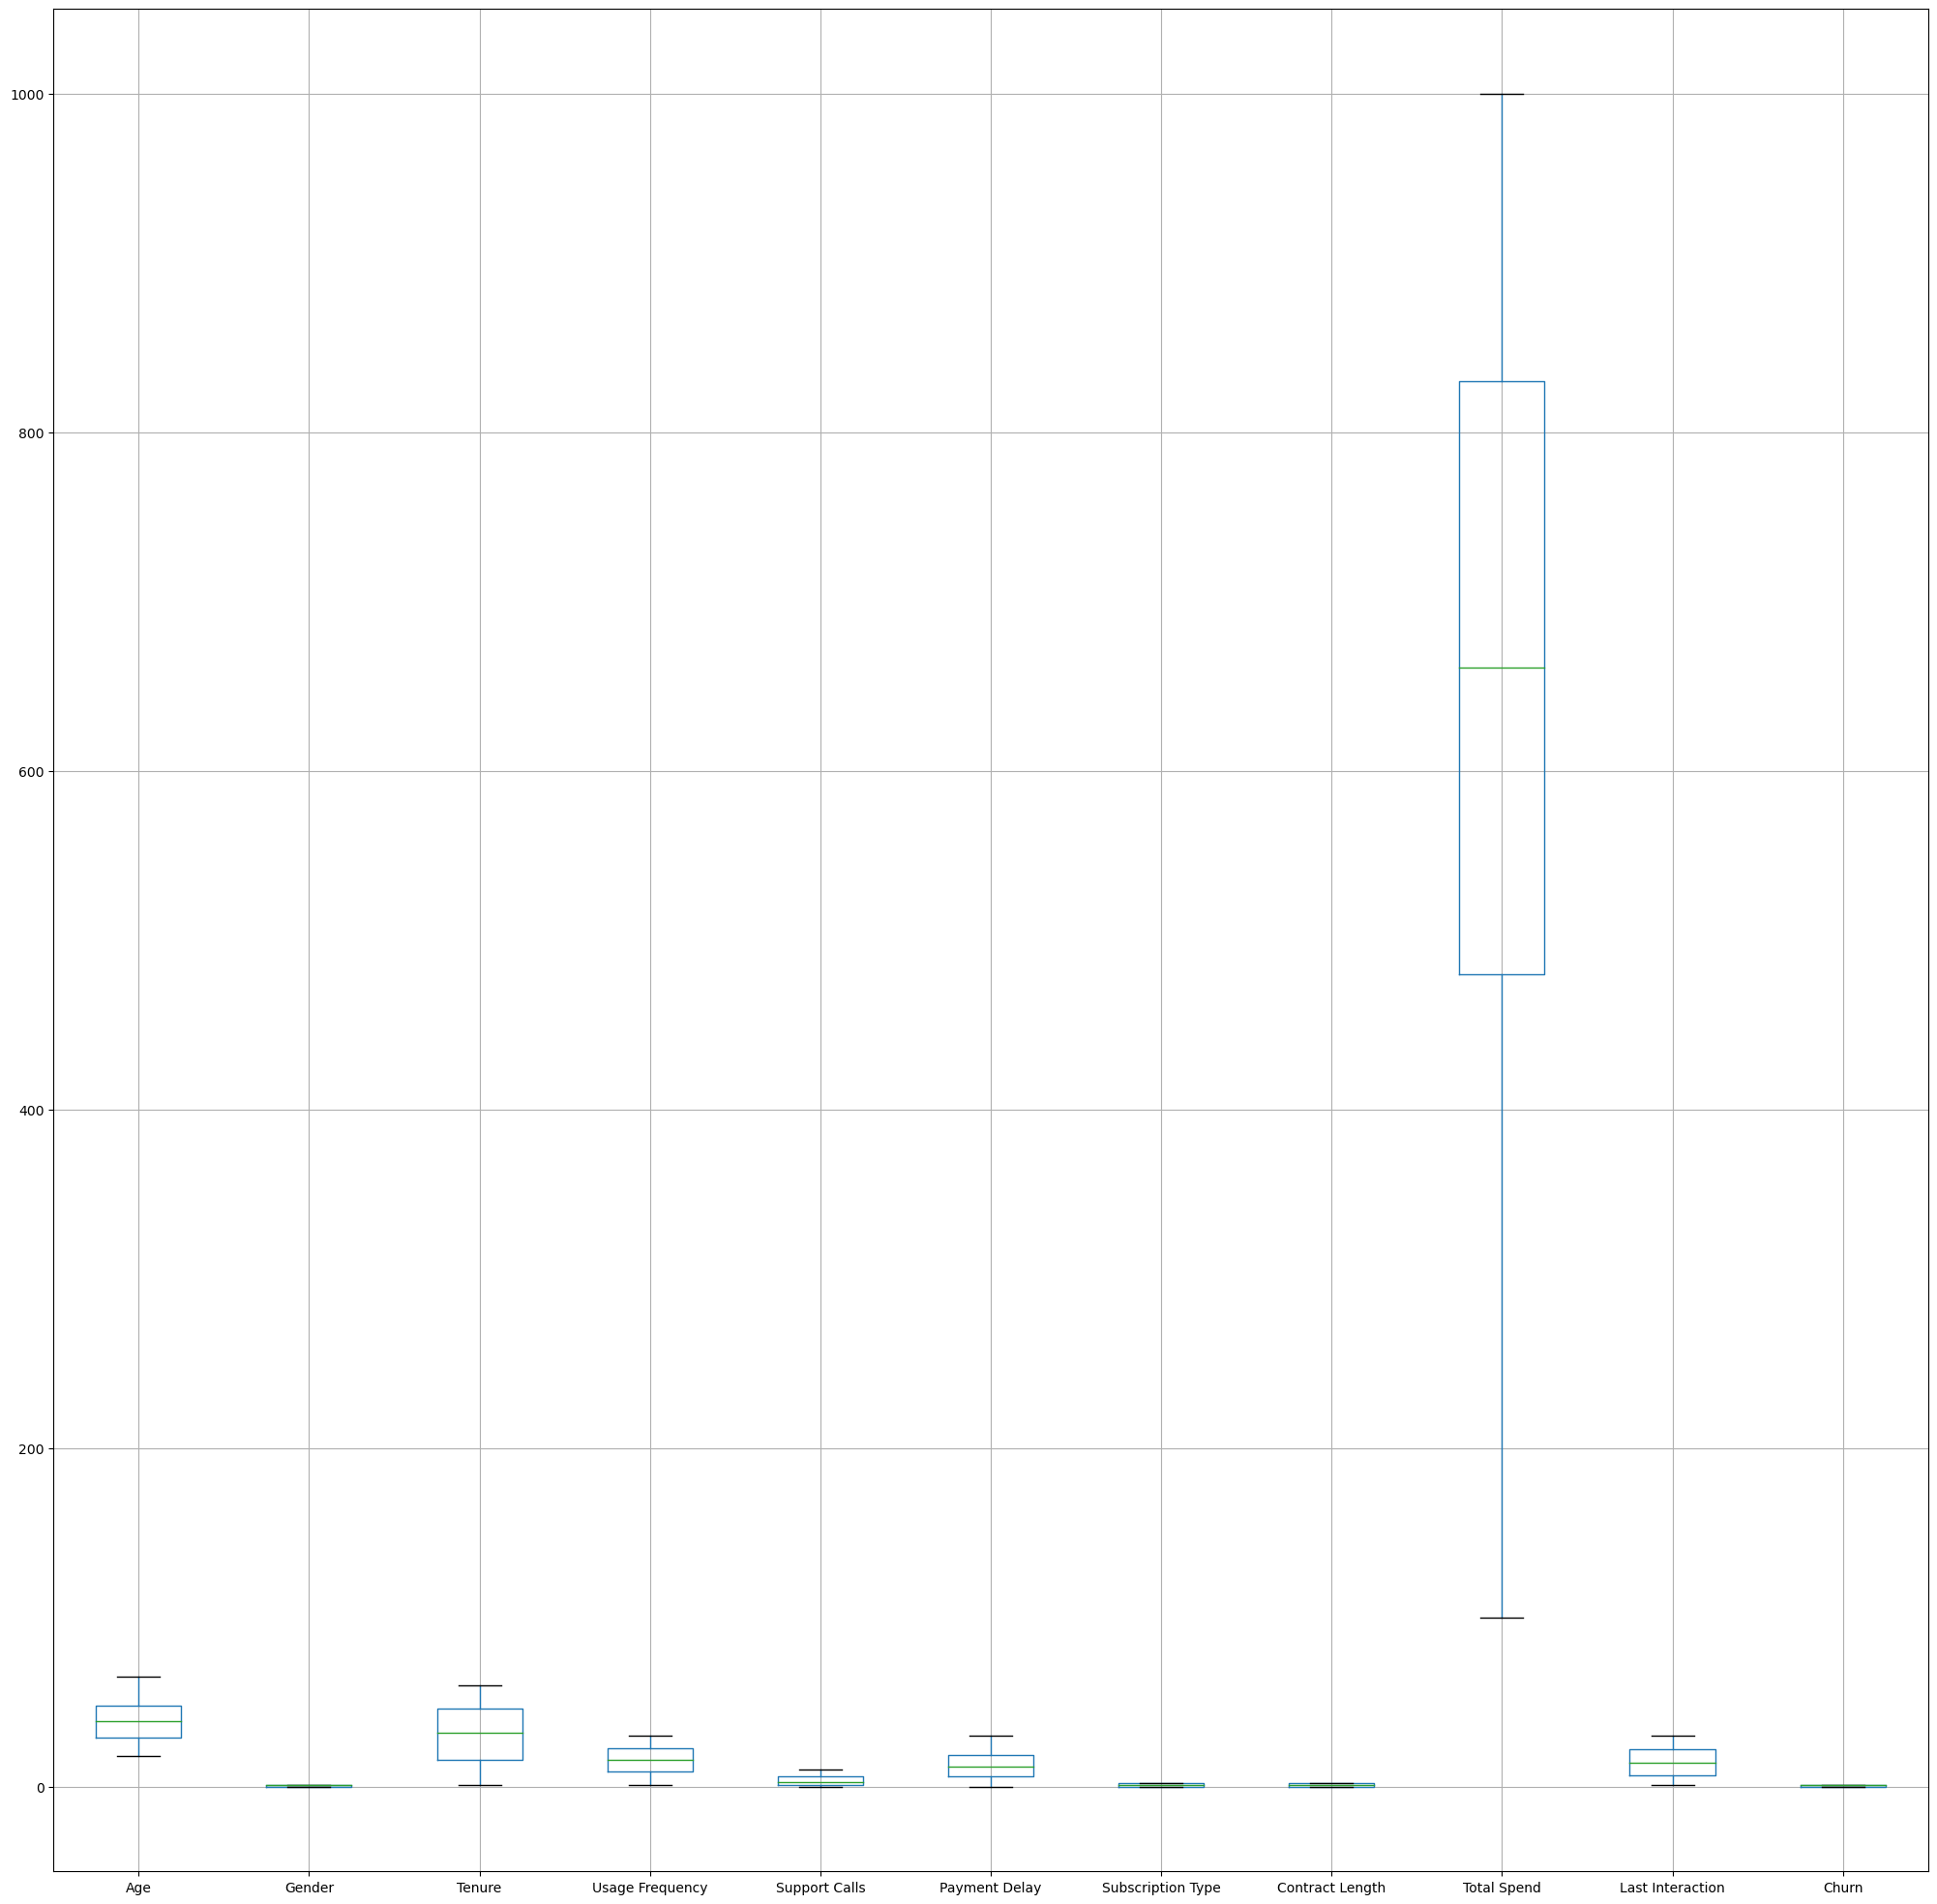

In [66]:
#boxplot shows shows outlier in total spend
columns_to_include = train.columns[1:]  # Exclude the first column customer id as it distorts the picture
train[columns_to_include].boxplot(figsize=(25, 25))
plt.show()


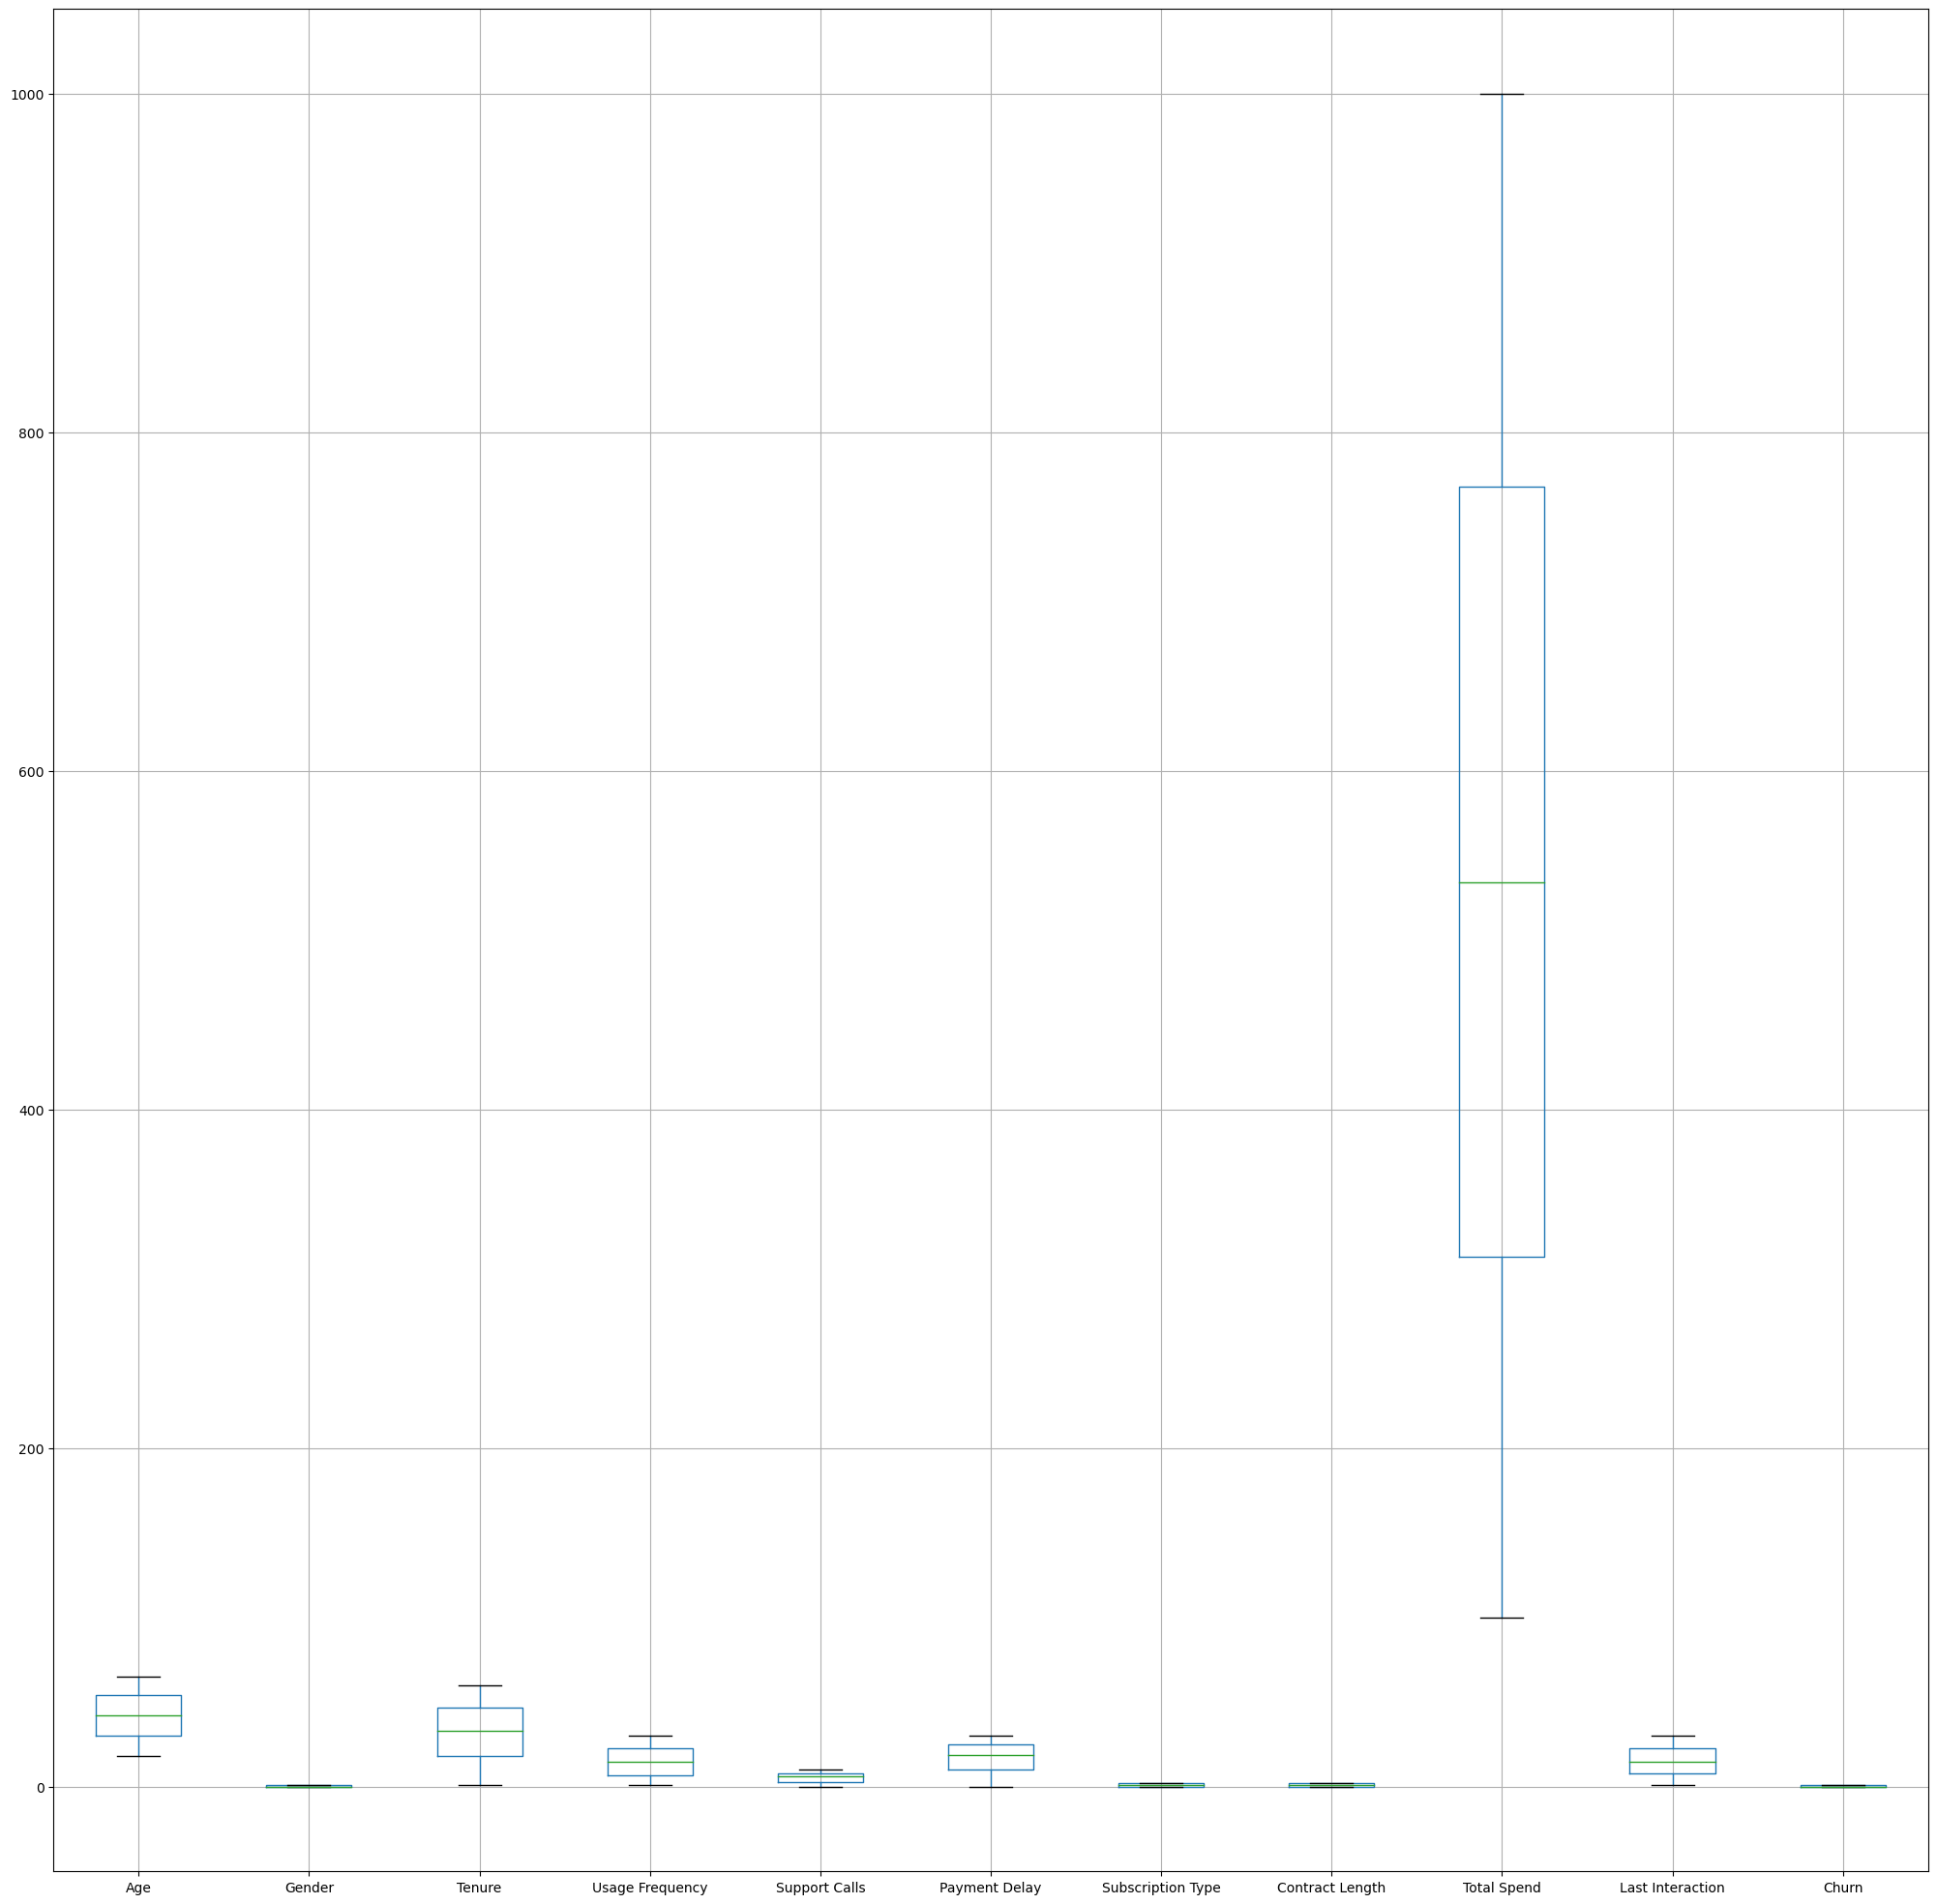

In [67]:
#boxplot confirms absence of outliers in train dataset
columns_to_include = test.columns[1:]  # Exclude the first column customer id as it distorts the picture
test[columns_to_include].boxplot(figsize=(25, 25))
plt.show()

boxplot show large distribution for total spend. However, histogram shows that there is a high density of high total spend amounts. Therefore, they are not regarded as outliers.

Feature selection

In [78]:
#correlation matrix to see which features are highly correlated to the churn feature
corr_matrix = train.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn                1.000000
Support Calls        0.574267
Payment Delay        0.312129
Age                  0.218394
Last Interaction     0.149616
Contract Length     -0.000093
Subscription Type   -0.017181
Usage Frequency     -0.046101
Tenure              -0.051919
Gender              -0.175395
Total Spend         -0.429355
CustomerID          -0.839365
Name: Churn, dtype: float64

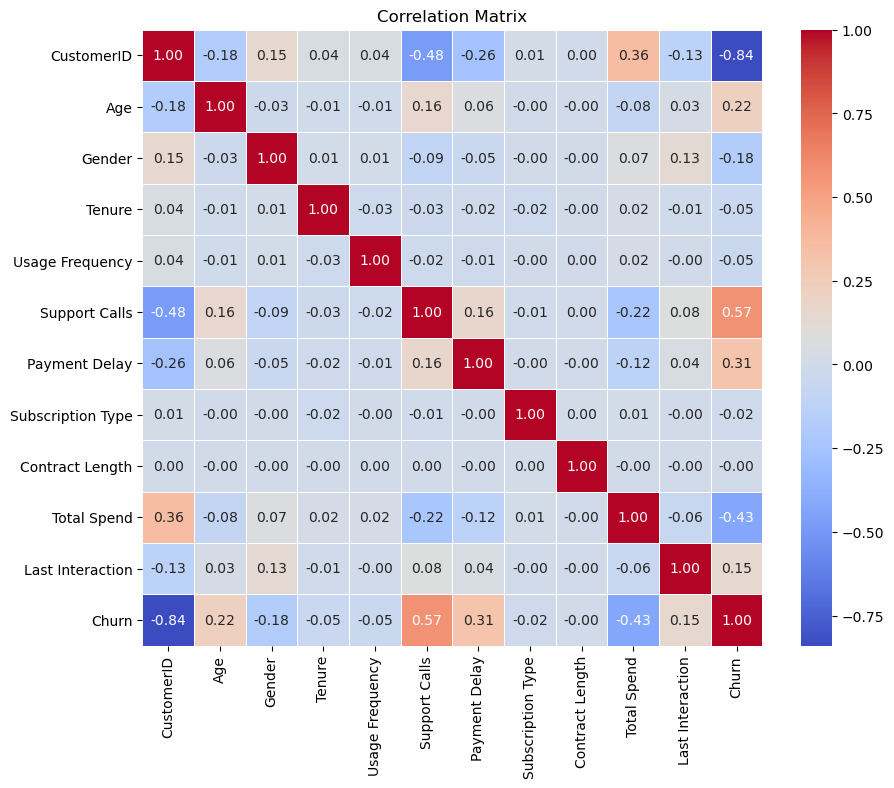

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
#high positive correlation with number of support calls and payment delays
#considerable negative correlation with total amount spend

In [166]:
X = train.iloc[:,1 :-1] #exclude target variable and customer id
y = train.iloc[:,-1] #target variable
# performing standardization as PCA is sensitive to scale of features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [167]:
components = None
pca = PCA(n_components = components) #or n_components = desired % of variance explained
# perform PCA on the scaled data
pca.fit(X_scaled)

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[14.70407488 11.34518747 10.34945806 10.01881864  9.98141059  9.60867213
  9.44069869  8.84025993  8.22855617  7.48286345]



In [168]:
#get cumulative variance
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 14.70407488  26.04926235  36.39872041  46.41753905  56.39894964
  66.00762177  75.44832045  84.28858038  92.51713655 100.        ]



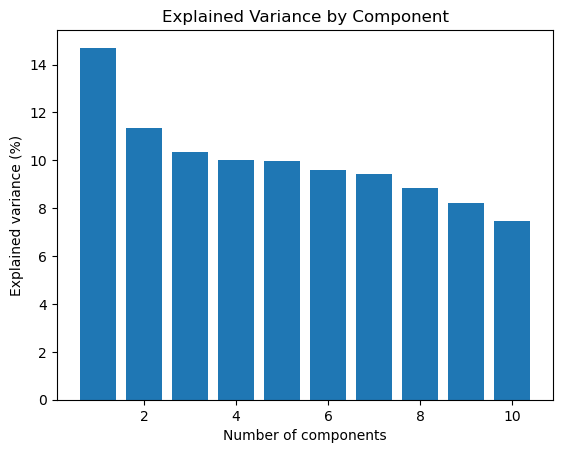

In [169]:
# Number of components you want to display
components = len(pca.explained_variance_ratio_) if components is None else components

# Create a bar chart
plt.bar(range(1, components + 1), pca.explained_variance_ratio_ * 100)

plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.title("Explained Variance by Component")

# Show the bar chart
plt.show()

In [170]:
#how much each feature contribures to each component
pca_components = abs(pca.components_)

In [171]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {train.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['Usage Frequency', 'Contract Length', 'Support Calls', 'CustomerID']
Component 1: ['Total Spend', 'Age', 'CustomerID', 'Support Calls']
Component 2: ['Gender', 'Tenure', 'Payment Delay', 'Subscription Type']
Component 3: ['Subscription Type', 'Payment Delay', 'Tenure', 'Gender']
Component 4: ['Subscription Type', 'Payment Delay', 'Tenure', 'CustomerID']
Component 5: ['Gender', 'Tenure', 'Payment Delay', 'CustomerID']
Component 6: ['CustomerID', 'Support Calls', 'Contract Length', 'Tenure']
Component 7: ['Support Calls', 'Contract Length', 'CustomerID', 'Total Spend']
Component 8: ['Age', 'Total Spend', 'Contract Length', 'Usage Frequency']
Component 9: ['Usage Frequency', 'Contract Length', 'CustomerID', 'Age']


In [172]:
# Create a DataFrame to store feature contributions to each principal component
feature_contributions = pd.DataFrame(
    data=pca.components_,
    columns=X.columns,  # Assuming X is a DataFrame with column names
    index=[f'PC{i+1}' for i in range(len(pca.components_))]
)

# Display the top N features contributing to each principal component (e.g., top 5)
num_top_features = 11
for pc in feature_contributions.index:
    top_features = feature_contributions.loc[pc].abs().sort_values(ascending=False).head(num_top_features)
    print(f"Top {num_top_features} Features for {pc}:")
    print(top_features)
    print()

Top 11 Features for PC1:
Support Calls        0.586348
Total Spend          0.507314
Payment Delay        0.423616
Age                  0.371546
Gender               0.209702
Last Interaction     0.161307
Tenure               0.080196
Usage Frequency      0.066816
Subscription Type    0.020941
Contract Length      0.001773
Name: PC1, dtype: float64

Top 11 Features for PC2:
Last Interaction     0.718703
Gender               0.694236
Age                  0.023647
Payment Delay        0.016083
Total Spend          0.013008
Support Calls        0.012936
Contract Length      0.011245
Usage Frequency      0.010252
Subscription Type    0.009793
Tenure               0.004583
Name: PC2, dtype: float64

Top 11 Features for PC3:
Tenure               0.700395
Usage Frequency      0.546733
Subscription Type    0.455187
Contract Length      0.053662
Total Spend          0.019157
Age                  0.005729
Gender               0.005239
Payment Delay        0.003841
Support Calls        0.003592
L

In [173]:
# Calculate the maximum contribution of each feature across all principal components
feature_max_contribution = feature_contributions.abs().max()
feature_max_contribution

# Identify features that do not contribute more than 5% to any principal component
threshold = 0.7  # 5% threshold
non_contributing_features = feature_max_contribution[feature_max_contribution < threshold].index

# Print the features that do not contribute more than 5% to any principal component
print("Features not contributing more than 5% to any principal component:")
print(non_contributing_features)

Features not contributing more than 5% to any principal component:
Index(['Gender', 'Usage Frequency', 'Subscription Type', 'Total Spend'], dtype='object')


In [174]:
feature_sum_contribution = feature_contributions.abs().sum()
feature_sum_contribution

Age                  2.122347
Gender               2.002258
Tenure               1.760819
Usage Frequency      2.249703
Support Calls        1.688893
Payment Delay        1.964268
Subscription Type    2.128565
Contract Length      1.523081
Total Spend          2.200555
Last Interaction     1.983229
dtype: float64

In [175]:
# Sort the Series in descending order by values
feature_sum_contribution_sorted = feature_sum_contribution.sort_values(ascending=False)

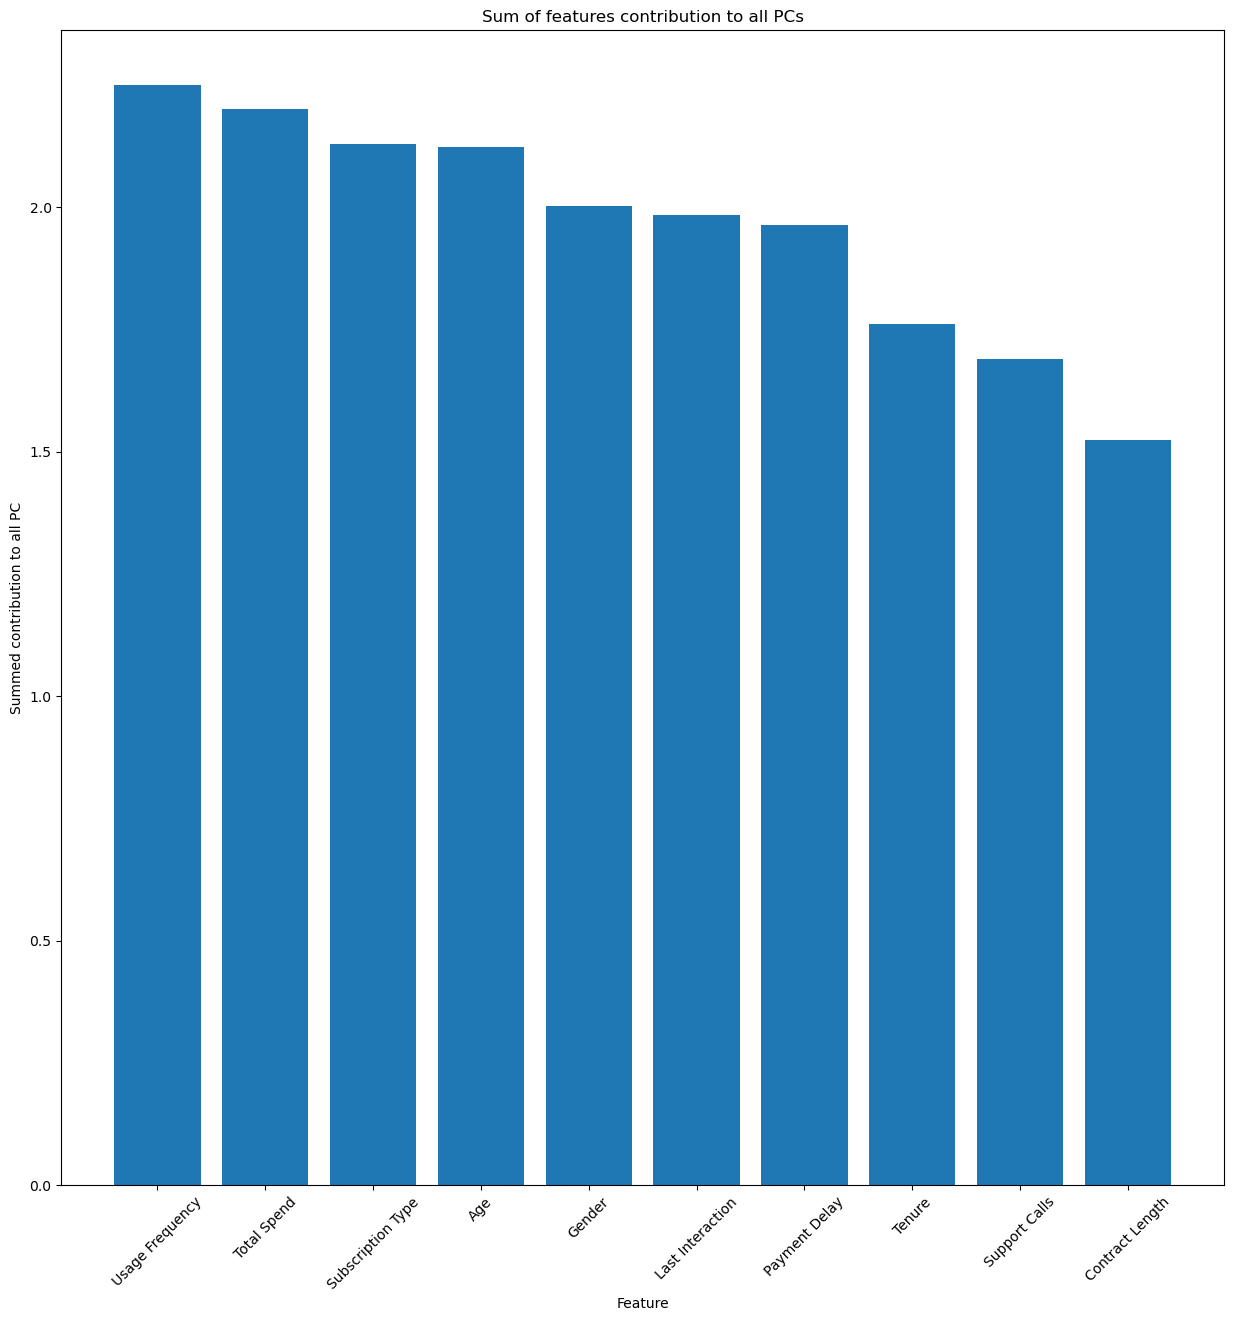

In [176]:
# Create a bar chart
plt.figure(figsize=(15,15))
plt.bar(feature_sum_contribution_sorted.index, feature_sum_contribution_sorted.values)

plt.xlabel("Feature")
plt.ylabel("Summed contribution to all PC")
plt.title("Sum of features contribution to all PCs")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the bar chart
plt.show()

In [165]:
feature_max_contribution

Age                  0.801065
Gender               0.694236
Tenure               0.700395
Usage Frequency      0.546733
Support Calls        0.793955
Payment Delay        0.740565
Subscription Type    0.553471
Contract Length      0.723631
Total Spend          0.552080
Last Interaction     0.718703
dtype: float64

Remove customer ID as it shouldn´t contain any information? or is customer id ascending ans thus allows conclusion about how long a customer is already with the bank

In [24]:
#https://towardsdatascience.com/using-principal-component-analysis-pca-for-machine-learning-b6e803f5bf1e
#

In [93]:
train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


Logistic Regression

In [144]:
#Xtrain = train.iloc[:, 1:-1]
ytrain = train.iloc[:,11:]
#Xtest = test.iloc[:, 1:-1]
ytest = test.iloc[:,11:]

In [145]:
Xtrain = train[['Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type','Total Spend', 'Last Interaction']]
Xtest = test[['Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type','Total Spend', 'Last Interaction']]

In [143]:
Xtrain.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Total Spend,Last Interaction
0,30.0,0,39.0,14.0,5.0,18.0,2,932.0,17.0
1,65.0,0,49.0,1.0,10.0,8.0,0,557.0,6.0
2,55.0,0,14.0,4.0,6.0,18.0,0,185.0,3.0
3,58.0,1,38.0,21.0,7.0,7.0,2,396.0,29.0
4,23.0,1,32.0,20.0,5.0,8.0,0,617.0,20.0


In [146]:
lr = LogisticRegression(max_iter=100000, random_state=9)
lr.fit(Xtrain, ytrain)
lr.score(Xtrain, ytrain)


c:\Users\johan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8513401930894309

In [147]:
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix

ypred = lr.predict(Xtest)
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

         0.0       0.23      0.94      0.37      8321
         1.0       0.98      0.53      0.69     56053

    accuracy                           0.59     64374
   macro avg       0.61      0.74      0.53     64374
weighted avg       0.89      0.59      0.65     64374



No diffence when leaving contract lenght in or not